In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## Read in the file
As we are only interested in recent crimes (2011 - 2015), we will remove all other years.

In [2]:
# Read in file and ensure that years are 2011 to now
crimedata=pd.read_csv("Jason_clean.csv")
crimedata = crimedata[crimedata["Year"]>2010]

In [3]:
print crimedata.shape
crimedata.head(5)

(1289313, 91)


,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Precipitation,TMAX,TMIN,WT01,WT05,WT02,WT08,WT03,WT10,closest_station
0,10313623,11/15/2015 11:51:00 PM,069XX S DAMEN AVE,1506,SOLICIT ON PUBLIC WAY,STREET,17,67,16,1164219,1858818,2015,41.768214,-87.673617,"(41.768213543000002, -87.673617145999998)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,D7.0,PROSTITUTION,23:51,20151115,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,18.9,6.7,0,0,0,0,0,0,1.022147
1,10313594,11/15/2015 11:46:00 PM,041XX W 47TH ST,0560,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),14,57,08A,1149632,1873148,2015,41.807832,-87.726715,"(41.807831884000002, -87.726715402000011)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,D8.0,ASSAULT,23:46,20151115,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,18.9,6.7,0,0,0,0,0,0,2.182132
2,10313635,11/15/2015 11:40:00 PM,012XX N HONORE ST,0486,DOMESTIC BATTERY SIMPLE,STREET,1,24,08B,1163925,1908232,2015,41.903817,-87.673303,"(41.903816925000001, -87.673303025999999)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,BATTERY,23:40,20151115,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,18.9,6.7,0,0,0,0,0,0,1.528224
3,10313604,11/15/2015 11:40:00 PM,059XX S CALUMET AVE,1320,TO VEHICLE,ALLEY,20,40,14,1179499,1865673,2015,41.786689,-87.617400,"(41.786689088000003, -87.617399787000011)",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,D2.0,CRIMINAL DAMAGE,23:40,20151115,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,18.9,6.7,0,0,0,0,0,0,1.244959
4,10314701,11/15/2015 11:30:00 PM,026XX N BOSWORTH AVE,0810,OVER $500,STREET,32,7,06,1165540,1917725,2015,41.929832,-87.667100,"(41.929832058999999, -87.667099876000009)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,D19.0,THEFT,23:30,20151115,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,18.9,6.7,0,0,0,0,0,0,1.460247


### Plotting crime rates
Here, we will plot the occurence rates of the following:
1. Crime Type
2. Scene of Crime
3. Time of Crime
4. Day of Crime
5. Month of Crime
6. Average Temperature of Crime


Primary Type
THEFT                               23.053905
BATTERY                             19.497205
NARCOTICS                           11.573761
CRIMINAL DAMAGE                     11.433919
BURGLARY                             6.832476
ASSAULT                              6.453670
MOTOR VEHICLE THEFT                  5.074330
ROBBERY                              4.144610
DECEPTIVE PRACTICE                   3.911618
CRIMINAL TRESPASS                    2.266633
WEAPONS VIOLATION                    1.288128
PUBLIC PEACE VIOLATION               1.038227
OFFENSE INVOLVING CHILDREN           0.756217
PROSTITUTION                         0.661360
INTERFERENCE WITH PUBLIC OFFICER     0.452256
CRIM SEXUAL ASSAULT                  0.439071
SEX OFFENSE                          0.321877
GAMBLING                             0.205536
ARSON                                0.152717
LIQUOR LAW VIOLATION                 0.138989
HOMICIDE                             0.119443
KIDNAPPING           

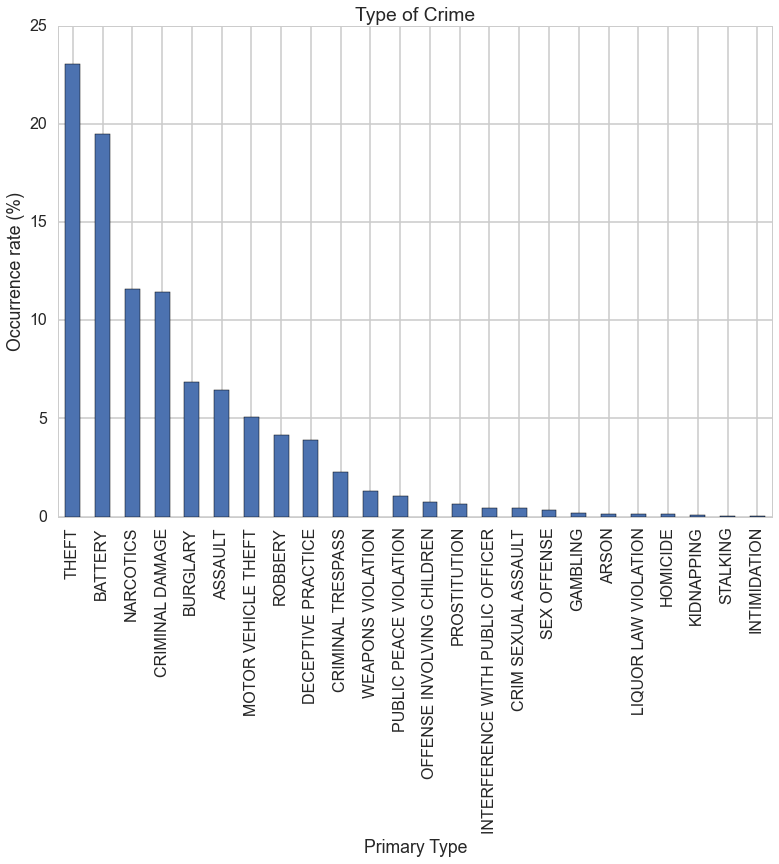

In [4]:
# Let us now take a look at the occurrence rates of the various types of crime
crimetypegb=crimedata.groupby(['Primary Type'])["Primary Type"].count()/len(crimedata)*100
crimetypegb.order(ascending=False, inplace=True)
print crimetypegb
crimetypegb.plot(kind='bar',title="Type of Crime")
plt.ylabel('Occurrence rate (%)')

Location Description
STREET                            25.553066
RESIDENCE                         15.369425
APARTMENT                         13.204707
SIDEWALK                          13.192840
OTHER                              3.762546
PARKING LOT/GARAGE(NON.RESID.)     3.250025
ALLEY                              2.513432
RESIDENTIAL YARD (FRONT/BACK)      2.377235
SCHOOL, PUBLIC, BUILDING           2.146957
SMALL RETAIL STORE                 2.060787
RESIDENCE-GARAGE                   2.055203
RESIDENCE PORCH/HALLWAY            1.961898
VEHICLE NON-COMMERCIAL             1.828260
RESTAURANT                         1.808250
DEPARTMENT STORE                   1.529419
GROCERY FOOD STORE                 1.220960
GAS STATION                        1.140763
PARK PROPERTY                      0.964467
BAR OR TAVERN                      0.751253
CTA PLATFORM                       0.657559
CTA TRAIN                          0.558437
VACANT LOT/LAND                    0.545019
COMMERCIAL 

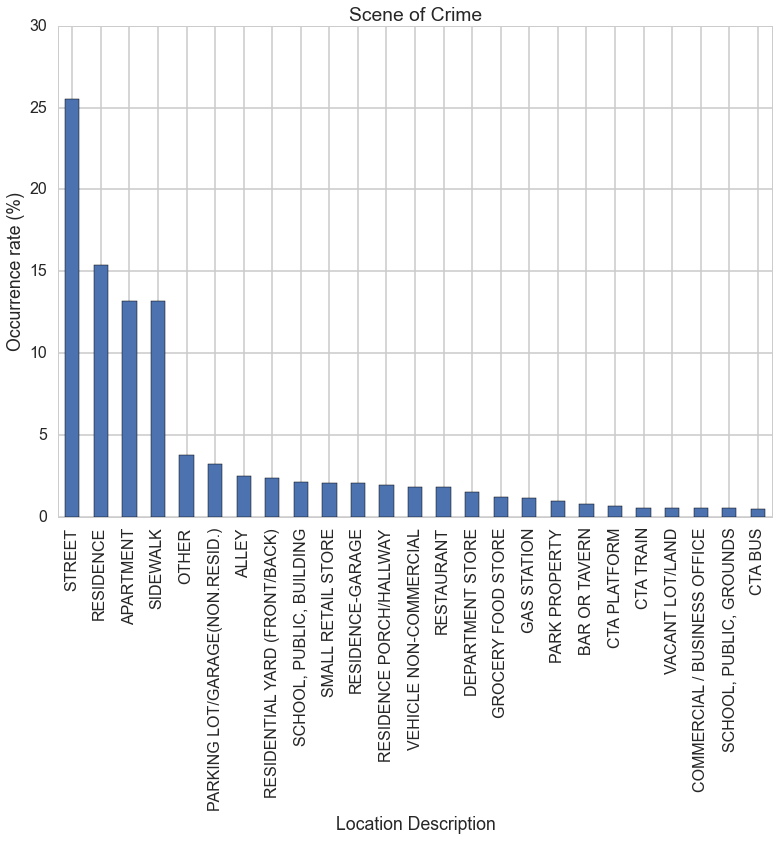

In [5]:
locationgb=crimedata.groupby(['Location Description'])["Location Description"].count()/len(crimedata)*100
locationgb.order(ascending=False, inplace=True)
print locationgb
locationgb.plot(kind='bar',title="Scene of Crime")
plt.ylabel('Occurrence rate (%)')

In [6]:
from datetime import datetime
format = '%m/%d/%Y %I:%M:%S %p'
crimedata["time_hour"]=crimedata.Date.apply(lambda row: datetime.strptime(row, format).strftime("%H"))
crimedata["month"]=crimedata.Date.apply(lambda row: datetime.strptime(row, format).strftime("%m"))

time_hour
00    4.957989
01    3.154626
02    2.685539
03    2.194424
04    1.613417
05    1.363594
06    1.602869
07    2.325037
08    3.391186
09    4.330446
10    4.248231
11    4.530707
12    5.551484
13    4.685053
14    5.049899
15    5.477103
16    5.136146
17    5.089765
18    5.576070
19    5.897870
20    5.716145
21    5.472217
22    5.509523
23    4.440659
Name: time_hour, dtype: float64


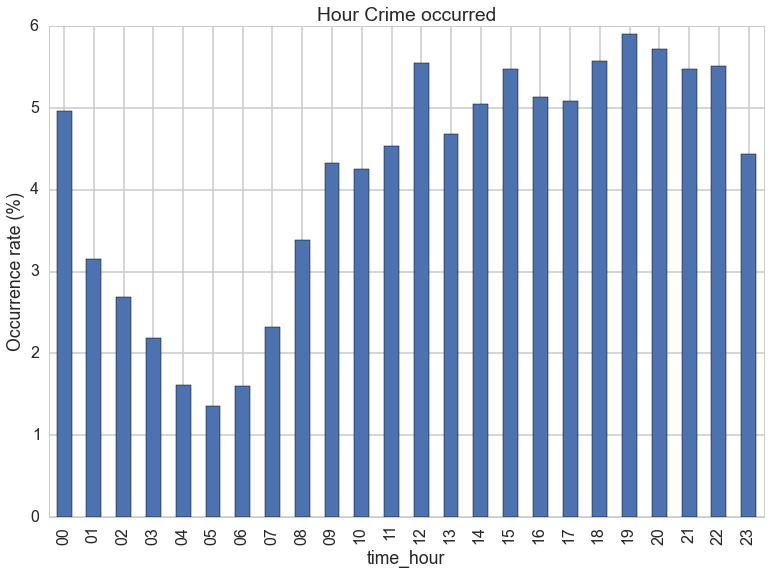

In [7]:
timegb=crimedata.groupby(['time_hour'])["time_hour"].count()/len(crimedata)*100
print timegb
timegb.plot(kind='bar',title="Hour Crime occurred")
plt.ylabel('Occurrence rate (%)')

Weekday_Monday       14.029177
Weekday_Tuesday      14.076101
Weekday_Wednesday    14.304905
Weekday_Thursday     14.084167
Weekday_Friday       15.011638
Weekday_Saturday     14.581797
Weekday_Sunday       13.912215
dtype: float64


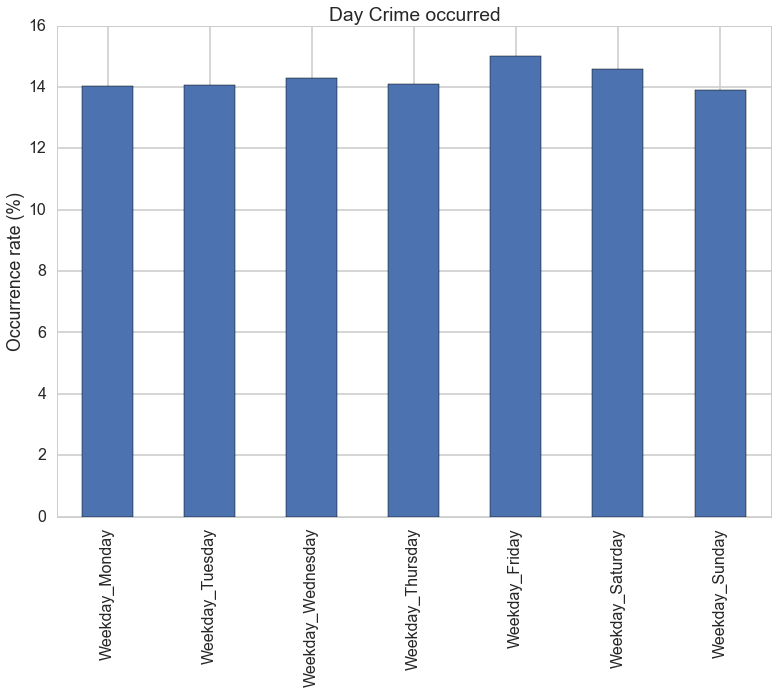

In [8]:
weekday=crimedata[["Weekday_Monday","Weekday_Tuesday","Weekday_Wednesday","Weekday_Thursday","Weekday_Friday","Weekday_Saturday","Weekday_Sunday"]].sum()/len(crimedata)*100
print weekday
weekday.plot(kind='bar',title="Day Crime occurred")
plt.ylabel('Occurrence rate (%)')

month
01    6.547828
02    5.673797
03    6.970069
04    6.998301
05    7.730706
06    7.872099
07    8.165511
08    7.901883
09    7.271547
10    7.223770
11    6.533790
12    6.330736
Name: month, dtype: float64


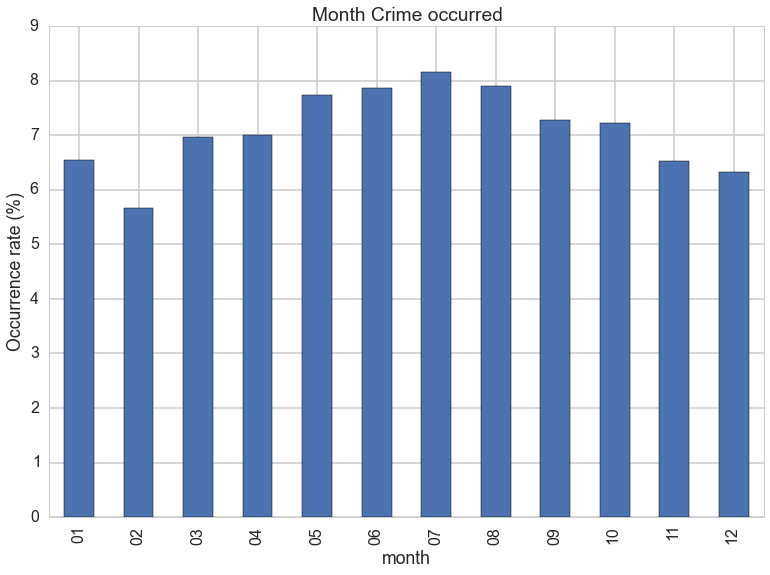

In [9]:
# For month, we will remove 2015 because the data is incomplete
#sub_crimedata = crimedata[crimedata["Year"]<2010]
month_group=crimedata[crimedata['Year'] < 2015].groupby(['month'])['month'].count()/len(crimedata)*100
print month_group
month_group.plot(kind='bar',title="Month Crime occurred")
plt.ylabel('Occurrence rate (%)')

In [10]:
crimedata["AVG_Temp"]=(crimedata['TMAX'] + crimedata['TMIN'])/2
crimedata["AVG_Temp"]=crimedata["AVG_Temp"].astype(int)

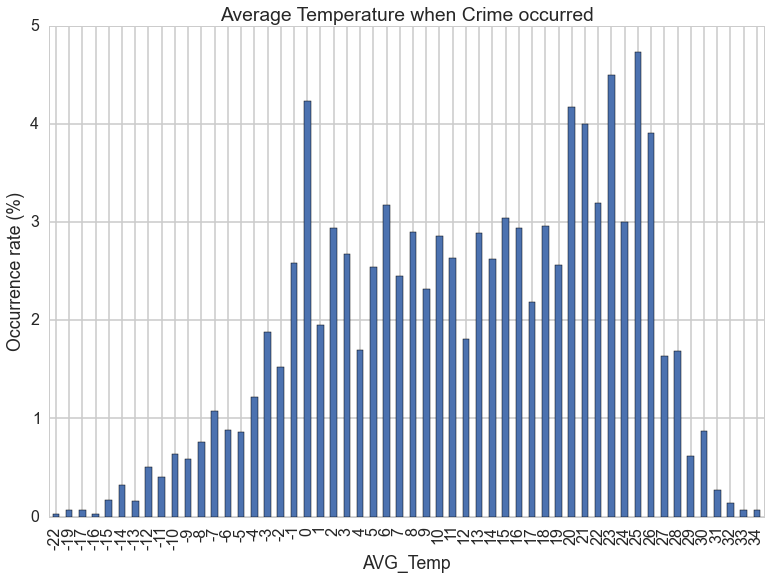

In [11]:
avgtempgb=crimedata.groupby(['AVG_Temp'])["AVG_Temp"].count()/len(crimedata)*100
#print avgtempgb
avgtempgb.plot(kind='bar',title="Average Temperature when Crime occurred")
plt.ylabel('Occurrence rate (%)')

### Diving deeper into the data

Now lets focus on only the 4 major types of crimes. To recap: 

1. THEFT                               23.053905
2. BATTERY                             19.497205
3. NARCOTICS                           11.573761
4. CRIMINAL DAMAGE                     11.433919


We will group the rest into others. This will give us 5 broad categories of crime types

In [37]:
# A simple function to group the crime types:
def topfour(row):
    keep = ["THEFT", "BATTERY", "NARCOTICS", "CRIMINAL DAMAGE"]
    if row not in keep:
        return "OTHERS"
    else:
        return row

In [38]:
crimedata["New_Type"] = crimedata["Primary Type"].apply(topfour)

In [40]:
# Here we write a function to take in a column name, title, and return a plot that displays the percentage, per column
# with the normalized types of crimes for each feature in the selected column
def plotsplit(cnam, title):
    datasplit = crimedata.groupby([cnam, "New_Type"])[cnam].count().unstack()
    # Convert everything to percentage for normalization, so we can compare!
    datasplit= datasplit.apply(lambda c: c / c.sum() * 100, axis=1)
    # Reorder columns
    datasplit = datasplit[['OTHERS', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BATTERY', 'THEFT']]
    datasplit.plot(kind = "bar", stacked = True, title = title)
    plt.ylabel('Fraction of Crime Type (%)')
    # Anchoring legend from http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True, shadow=True)
    plt.ylim([0,120])

Now we can breakdown the Crime scene, time, etc by crime type to see if we can spot any trends

Now lets look at the crime type per location

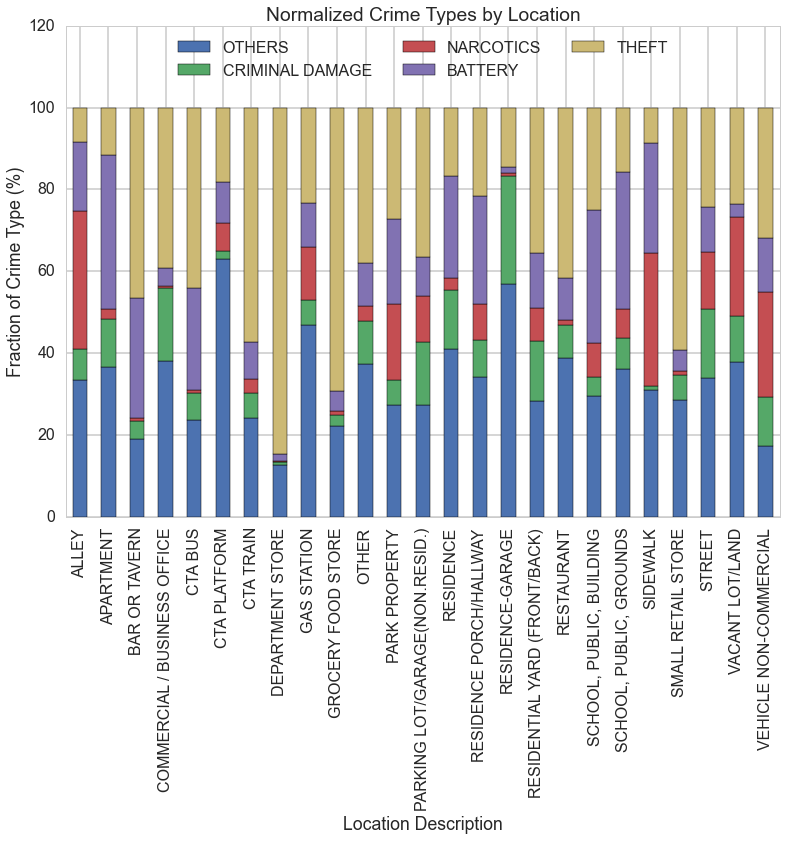

In [41]:
plotsplit("Location Description", "Normalized Crime Types by Location")

Crime type per hour of day

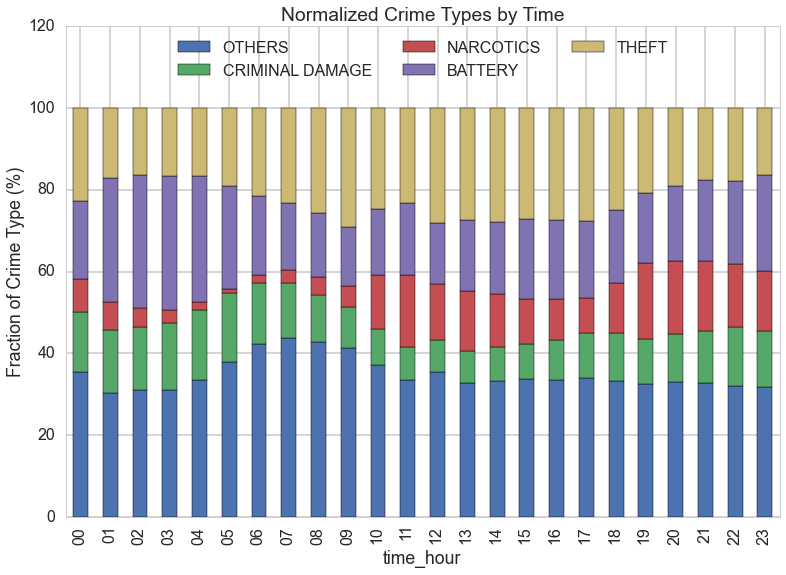

In [42]:
plotsplit("time_hour", "Normalized Crime Types by Time")

Crimes by day:
First we need to un-get_dummies the data...

In [43]:
# Writing a function to turn Mon, Tue, Wed, Thur, Fri, Sat, Sun into 1 - 7
crimedata["Weekday_Tuesday"] = (crimedata["Weekday_Tuesday"].apply(lambda x: x+1 if x > 0 else 0))
crimedata["Weekday_Wednesday"] = (crimedata["Weekday_Wednesday"].apply(lambda x: x+2 if x > 0 else 0))
crimedata["Weekday_Thursday"] = (crimedata["Weekday_Thursday"].apply(lambda x: x+3 if x > 0 else 0))
crimedata["Weekday_Friday"] = (crimedata["Weekday_Friday"].apply(lambda x: x+4 if x > 0 else 0))
crimedata["Weekday_Saturday"] = (crimedata["Weekday_Saturday"].apply(lambda x: x+5 if x > 0 else 0))
crimedata["Weekday_Sunday"] = (crimedata["Weekday_Sunday"].apply(lambda x: x+6 if x > 0 else 0))

In [44]:
crimedata["Num_Day"] = crimedata["Weekday_Monday"] + crimedata["Weekday_Tuesday"] + crimedata["Weekday_Wednesday"] + crimedata["Weekday_Thursday"] + crimedata["Weekday_Friday"] + crimedata["Weekday_Saturday"] + crimedata["Weekday_Sunday"]
crimedata["Num_Day"] = crimedata["Num_Day"].astype(int)

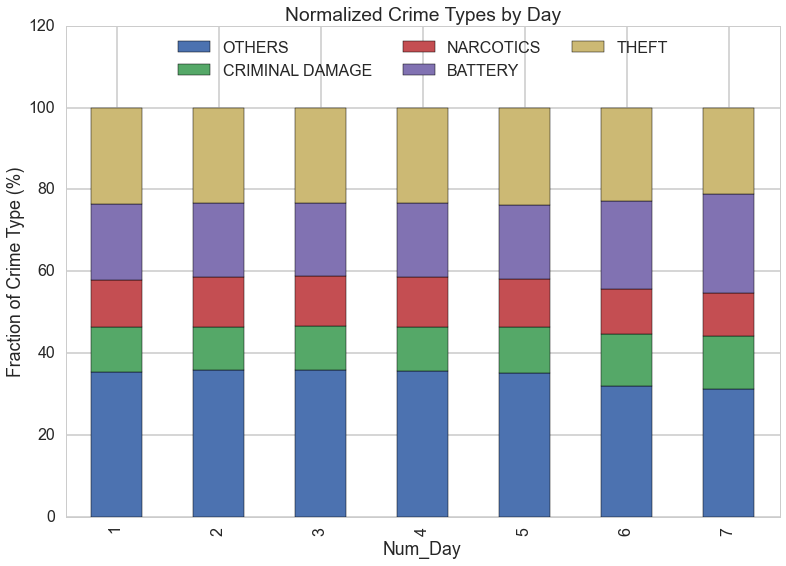

In [45]:
plotsplit("Num_Day", "Normalized Crime Types by Day")

Crimes by month:

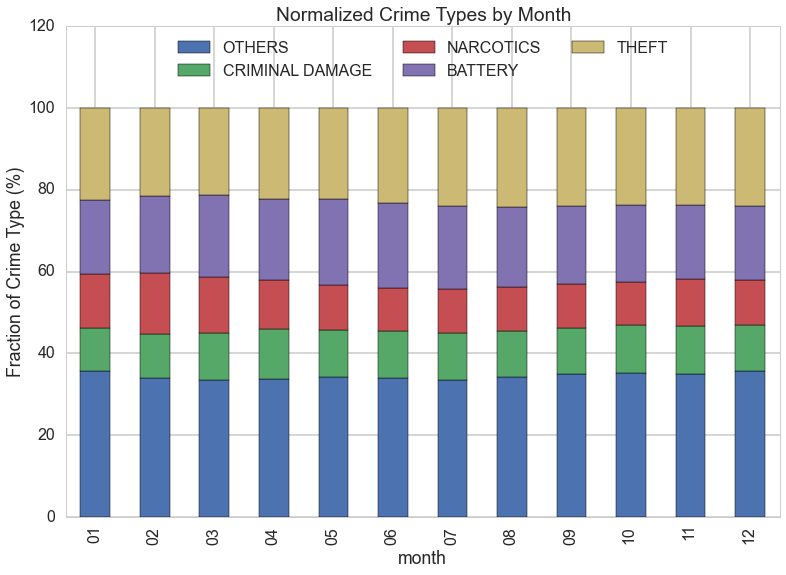

In [46]:
plotsplit("month", "Normalized Crime Types by Month")

In [47]:
crimedata["AVG_Temp"]=(crimedata['TMAX'] + crimedata['TMIN'])/2
crimedata["AVG_Temp"]=crimedata["AVG_Temp"].astype(int)

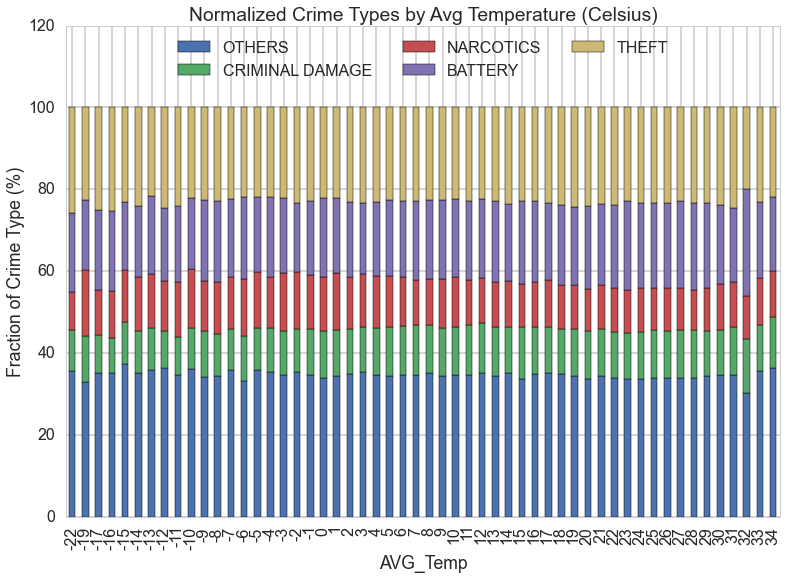

In [48]:
plotsplit("AVG_Temp", "Normalized Crime Types by Avg Temperature (Celsius)")

## Now lets make a map to visualize the crime locations and type

In [49]:
import folium
from IPython.display import HTML

In [50]:
def display(m, height=300):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

We can start an instance of the Chicago map like this:

In [51]:
map = folium.Map(location=[41.8369, -87.6847], zoom_start=10)
map.simple_marker([41.8369, -87.6847]) 
display(map)

In [ ]:
##mapping the main crime types to the map 
types = ['OTHERS', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BATTERY', 'THEFT']
for i in types:
    typedata=crimedata[crimedata["New_Type"]==i]
    map = folium.Map(location=[41.8369, -87.6847], zoom_start=10)
    #add a marker for every record in the filtered data, use a clustered view
    for each in typedata[0:len(typedata)].iterrows():
        map.simple_marker(
            location = [each[1]['Latitude'],each[1]['Longitude']], 
            clustered_marker = True)
    #display(map)
    map.create_map(path=i + 'map.html') 

In [ ]:
# All crimes to map
map = folium.Map(location=[41.8369, -87.6847], zoom_start=10)
#add a marker for every record in the filtered data, use a clustered view
for each in crimedata[0:len(crimedata)].iterrows():
    map.simple_marker(
        location = [each[1]['Latitude'],each[1]['Longitude']], 
        clustered_marker = True)
#display(map)
map.create_map(path='ALLCRIMESmap.html') 